<a href="https://colab.research.google.com/github/ashamril/Text-Analytics/blob/master/EN_Twitter_Sentiment_Analysis_on_any_keyword_here_in_Malaysia_Twitter_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#English Twitter Sentiment Analysis on any_keyword_here in Malaysia
**Sentiment Analysis**, or **Opinion Mining**, is a sub-field of **Natural Language Processing (NLP)** that tries to identify and extract opinions within a given text. The aim of sentiment analysis is to gauge the attitude, sentiments, evaluations, attitudes and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

**NLTK**, is a suite of libraries and programs for symbolic and statistical natural language processing for English, written in the Python programming language.
https://www.nltk.org/

Tweets are collected using **Twitter API**, Tweepy, which is developed by Twitter. It only allows the extraction of tweets from the past seven days. 

In [1]:
import os
import tweepy as tw
import pandas as pd

In [2]:
consumer_key= 'xxx'
consumer_secret= 'xxx'
access_token= 'xxx'
access_token_secret= 'xxx'

In [3]:
# Creating the authentication object
auth = tw.OAuthHandler(consumer_key, consumer_secret)

# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)

# Creating the API object while passing in auth information
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
%pip install googletrans

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from googletrans import Translator

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# # Using the API object to get tweets from your timeline, and storing it in a variable called public_tweets
# public_tweets = api.home_timeline()
# # foreach through all tweets pulled
# for tweet in public_tweets:
#    # printing the text stored inside the tweet object
#    print(tweet.text)

In [7]:
# Change accordingly
keyword = "mco OR pkp" # use OR or AND respectively, eg. mco OR pkp
keyword = keyword + " -filter:retweets"
#location = "Kuala Lumpur, Malaysia"
location = "3.1390, 101.6869" # Kuala Lumpur is located at 3.1390° N, 101.6869° E
start_date = "2020-08-01"    # yyyy-mm-dd
#latest_date = "2020-07-25"
number_tweets = 1000
lang = "en"

In [8]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=keyword,
              lang=lang,
              location=location,
              #since=start_date).items()
              since=start_date).items(number_tweets)

tweets_text = [[tweet.user.screen_name, tweet.text, tweet.created_at] for tweet in tweets]
tweet_df = pd.DataFrame(data=tweets_text, columns=["username", "tweet_text", "date"])
# Collect a list of tweets
# [tweet.text for tweet in tweets]

In [9]:
print("Number of tweets collected: ")
len(tweet_df)

Number of tweets collected: 


1000

In [26]:
pd.options.display.max_columns = None
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', 1000)
df = tweet_df.copy()
df

,username,tweet_text,date
0,RedKatLife,Swapped my #MCO for #CRO\nVery easy! Selected EXPRESS option to swap my staked MCO &amp; MCO balance... one click &amp; done… https://t.co/kZrIFttga8,2020-08-03 15:38:03
1,hanisah_kadir,@zawanizaid Tak pun huhu I registered dgn mdc after mco so tak dpt this intake. You yourself dapat ke this intake?,2020-08-03 15:37:45
2,PKP_Magic,Me after seeing today's B&amp;R announcement: https://t.co/NBnef1zclC https://t.co/v9abmueyoW,2020-08-03 15:37:36
3,UptownAlchemist,@cryptocom What about people people previously at the 500 and (18% CRO staking/earn rewards) and now have less than… https://t.co/5TUkBVyIpx,2020-08-03 15:37:29
4,Yodaskk,"@Jcviganoni @cryptocom It depend, personnaly I'm not moving my 50 $mco staked for my card, as if I understand corre… https://t.co/jHh5TPCNAS",2020-08-03 15:36:49
...,...,...,...
995,EclairBlock,@cryptocom We should have guessed that once you got your new CRO toy you wouldn’t give a shit about the MCO holders,2020-08-03 08:10:13
996,20xBTC,#NIMIQ ecosystem is growing so big.\n\nNow you can buy eBooks with $NIM\n\nIt's so great to see $NIMIQ growing. 🚀🚀… https://t.co/8TWxttxWfm,2020-08-03 08:10:08
997,Fjmoreiram,"@CryptoJeremyYT Mco os done, now only cro. The card now os expensive . Rip new users",2020-08-03 08:09:47
998,wija07,@jkblablabla @cryptocom Yea.. if nothing changes from mco.. nexo is no brainer choice for me..,2020-08-03 08:09:46


In [27]:
corpus = df["tweet_text"]
corpus_list = corpus.tolist()

In [12]:
#  Language detection
data = []
for i in corpus_list: 
  t = Translator().detect(i)
  data.append([t.lang, t.confidence, i])
  
detection_df = pd.DataFrame(data)
print(detection_df)

      0  ...                                                                                                                                                      2
0    en  ...  Swapped my #MCO for #CRO\nVery easy! Selected EXPRESS option to swap my staked MCO &amp; MCO balance... one click &amp; done… https://t.co/kZrIFttga8
1    ms  ...                                     @zawanizaid Tak pun huhu I registered dgn mdc after mco so tak dpt this intake. You yourself dapat ke this intake?
2    en  ...                                                          Me after seeing today's B&amp;R announcement: https://t.co/NBnef1zclC https://t.co/v9abmueyoW
3    en  ...           @cryptocom What about people people previously at the 500 and (18% CRO staking/earn rewards) and now have less than… https://t.co/5TUkBVyIpx
4    en  ...           @Jcviganoni @cryptocom It depend, personnaly I'm not moving my 50 $mco staked for my card, as if I understand corre… https://t.co/jHh5TPCNAS
..   ..  ...    

In [13]:
  detection_df.columns = ['Lang','Confidence','Text']
  s = detection_df.Lang
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  detection_df2 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  detection_df2.head(10)

,Counts,Percentage
en,983,98.3%
ms,5,0.5%
fr,2,0.2%
eo,2,0.2%
id,1,0.1%
hi,1,0.1%
ha,1,0.1%
msid,1,0.1%
ja,1,0.1%
enhi,1,0.1%


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


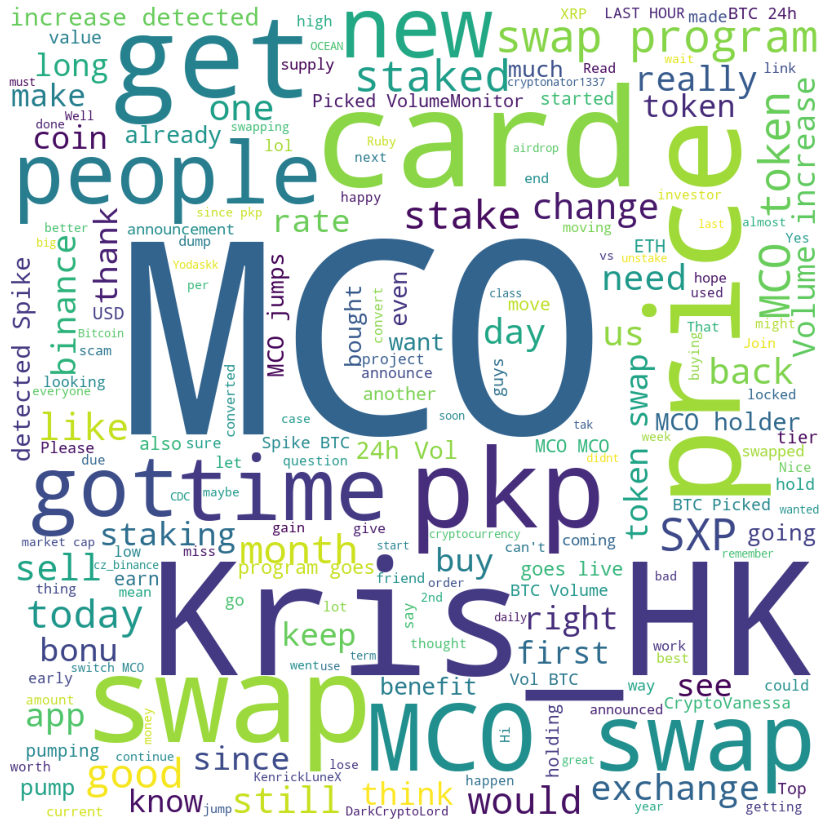

In [30]:
# Word cloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS 

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['igshid', 'http', 'https', 'www', 'instagram', 'amp', 'com', 'ly', 'ow', 'id', 'i\'m', 'cryptocom', 'cro', 'co', 'crypto', 'thestar']
stopwords.extend(newStopWords)
#stopwords = newStopWords
#stopwords = set(STOPWORDS)


unique_string=(" ").join(corpus_list)
wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
# VADER uses a combination of a sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
# https://github.com/cjhutto/vaderSentiment

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
model = SentimentIntensityAnalyzer()

In [17]:
# Pie Chart
def cls_corpus_pie(corpus_list):
  data=[]
  for sentence in corpus_list: 
    corpus_result = model.polarity_scores(sentence)
    # Decide whether the text is positive, negative or neutral 
    if corpus_result['compound'] >= 0.05 : 
      cls = "Positive"
    elif corpus_result['compound'] <= -0.05 : 
      cls = "Negative" 
    else : 
      cls = "Neutral" 
    data.append([corpus_result, cls, sentence])
    df = pd.DataFrame(data)

  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Neutral', 'Positive', 'Compound']

  df2['Classification'] = df[1]
  df2['Text'] = df[2]
  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100}).sort_index(ascending=False)
  
  #pd.options.display.max_columns = None
  #pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Total Number of Tweets: ", df2['Classification'].count())
  print("")
  print(df3)
  print("")
  colors=['green', 'yellow', 'red']
  explode = (0.07, 0, 0)
  df3.Counts.plot(kind='pie', explode=explode, colors=colors, autopct='%1.2f%%', shadow=True, startangle=50, fontsize=15)
  plt.title("EN Twitter Sentiment Analysis on {} in Malaysia".format(keyword), fontweight='bold', fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
  plt.xlabel('Percentage Distribution of the Sentiments', fontweight='bold', fontsize=15)
  plt.ylabel('')
  plt.show()

     Negative  Neutral  Positive  Compound Classification                                                                                                                                                   Text
0       0.000    0.863     0.137    0.5400       Positive  Swapped my #MCO for #CRO\nVery easy! Selected EXPRESS option to swap my staked MCO &amp; MCO balance... one click &amp; done… https://t.co/kZrIFttga8
1       0.000    1.000     0.000    0.0000        Neutral                                     @zawanizaid Tak pun huhu I registered dgn mdc after mco so tak dpt this intake. You yourself dapat ke this intake?
2       0.000    1.000     0.000    0.0000        Neutral                                                          Me after seeing today's B&amp;R announcement: https://t.co/NBnef1zclC https://t.co/v9abmueyoW
3       0.000    1.000     0.000    0.0000        Neutral           @cryptocom What about people people previously at the 500 and (18% CRO staking/earn rewards) and

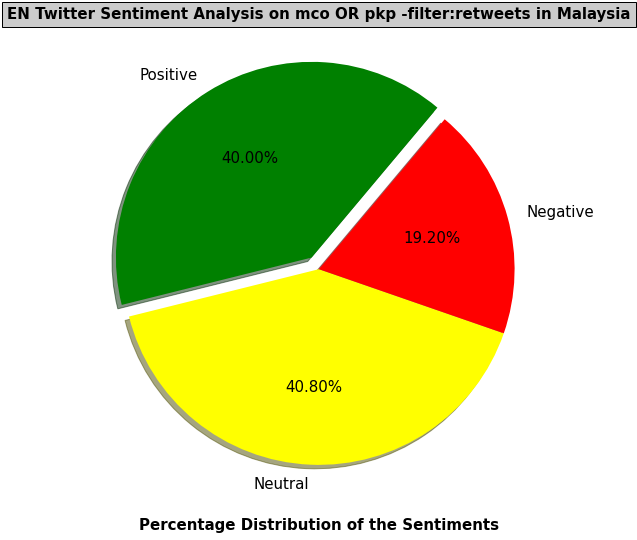

In [28]:
cls_corpus_pie(corpus_list)

In [19]:
# Bar Chart
def cls_corpus(corpus_list):
  data=[]
  for sentence in corpus_list: 
    corpus_result = model.polarity_scores(sentence)
    # Decide whether the text is positive, negative or neutral 
    if corpus_result['compound'] >= 0.05 : 
      cls = "Positive"
    elif corpus_result['compound'] <= -0.05 : 
      cls = "Negative" 
    else : 
      cls = "Neutral" 
    data.append([corpus_result, cls, sentence])
    df = pd.DataFrame(data)

  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Neutral', 'Positive', 'Compound']

  df2['Classification'] = df[1]
  df2['Text'] = df[2]
  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  #sns.barplot(class_count.index, class_count.values, alpha=0.8)
  ax = class_count.plot.bar(color=['red', 'yellow', 'green'], figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.title("Twitter Sentiment Analysis on {} in Malaysia".format(keyword), fontweight='bold', fontsize=15)
  plt.ylabel('Number of Sentiments', fontweight='bold', fontsize=15)
  plt.xlabel('Classification', fontweight='bold', fontsize=15)
  plt.grid(True)

  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  
  i = 0
  #label = np.round(class_count.values, 2)
  label = df3.Percentage
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.01), fontweight='bold', fontsize=15)
      i = i+1

  #pd.options.display.max_columns = None
  #pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Total Number of Tweets: ", df2['Classification'].count())
  print("")
  print(df3)
  print("")
  plt.show()

     Negative  Neutral  Positive  Compound Classification                                                                                                                                                   Text
0       0.000    0.863     0.137    0.5400       Positive  Swapped my #MCO for #CRO\nVery easy! Selected EXPRESS option to swap my staked MCO &amp; MCO balance... one click &amp; done… https://t.co/kZrIFttga8
1       0.000    1.000     0.000    0.0000        Neutral                                     @zawanizaid Tak pun huhu I registered dgn mdc after mco so tak dpt this intake. You yourself dapat ke this intake?
2       0.000    1.000     0.000    0.0000        Neutral                                                          Me after seeing today's B&amp;R announcement: https://t.co/NBnef1zclC https://t.co/v9abmueyoW
3       0.000    1.000     0.000    0.0000        Neutral           @cryptocom What about people people previously at the 500 and (18% CRO staking/earn rewards) and

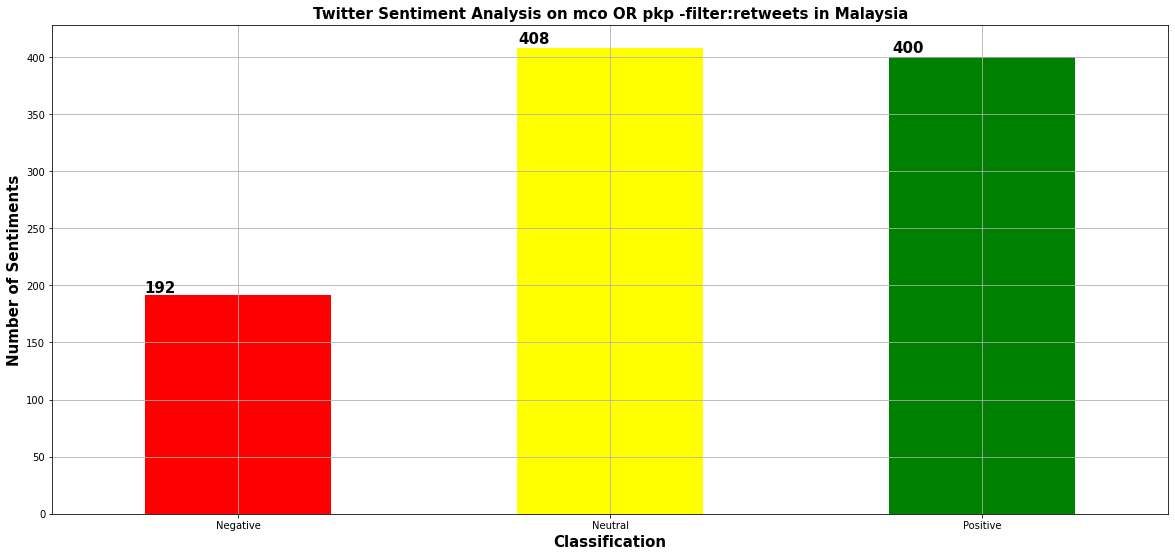

In [29]:
cls_corpus(corpus_list)